In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy, math

In [146]:
def z_score_normalization(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return (X_norm, mu, sigma)

In [147]:
dataset = pd.read_csv("../Housing.csv")
X_train = dataset.iloc[:, 1:5].values
y_train = dataset.iloc[:, 0].values
X_features = ["area", "bedroom", "bathrooms", "floors"]

In [148]:
def display_x_train(X_train, X_features):
    fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
    for i in range(len(ax)):
        ax[i].scatter(X_train[:, i], y_train, c="b")
        ax[i].set_xlabel(X_features[i])
    plt.show()

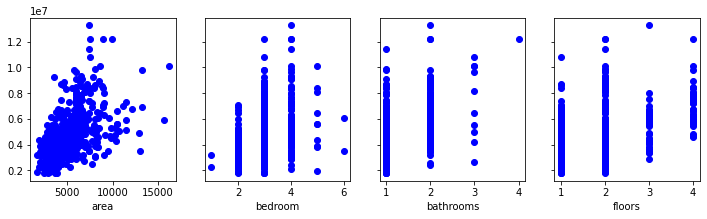

In [149]:
display_x_train(X_train, X_features)

In [150]:
#max_X = copy.deepcopy(X_train[0])
#for i in range(len(X_train)):
#    for j in range(4):
#        max_X[j] = max(max_X[j], X_train[i][j])
#X_train = X_train / max_X
X_train, X_mu, x_sigma = z_score_normalization(X_train)
y_train = y_train / 10000

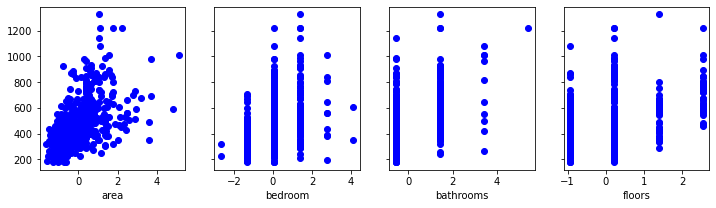

In [151]:
display_x_train(X_train, X_features)

In [152]:
def compute_cost(x, y, w, b):
    m, n = x.shape
    j_wb = 0
    
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        j_wb += (f_wb - y[i]) ** 2
    return j_wb / (2 * m)

In [153]:
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    
    for i in range(m):
        err = (np.dot(x[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * x[i, j]
        dj_db += err
        
    return dj_dw / m, dj_db / m

In [154]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iter, compute_cost, compute_gradient):
    m, n = x.shape
    w = copy.deepcopy(w_in)
    b = b_in
    j_hist = []
    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 10000:
            j_hist.append(compute_cost(x, y, w, b))
        if i% math.ceil(num_iter / 10) == 0:
            print(f"Iteration {i:4d}: Cost {j_hist[-1]}   ")
    return w, b, j_hist

In [155]:
alpha = 0.001
num_iter = 3000
w_in = np.zeros(X_train.shape[1])
b_in = 0

w, b, j_hist = gradient_descent(X_train, y_train, w_in, b_in, alpha, num_iter, compute_cost, compute_gradient)

Iteration    0: Cost 130811.82806987874   
Iteration  300: Cost 73951.87473813596   
Iteration  600: Cost 43762.852700883246   
Iteration  900: Cost 27529.587333819338   
Iteration 1200: Cost 18728.448726822928   
Iteration 1500: Cost 13931.315695751122   
Iteration 1800: Cost 11307.46876751471   
Iteration 2100: Cost 9868.909199891192   
Iteration 2400: Cost 9078.820188060678   
Iteration 2700: Cost 8644.26312717898   


In [156]:
w, b

(array([78.78388646, 19.67453422, 58.427247  , 43.77203104]),
 452.9763725262476)

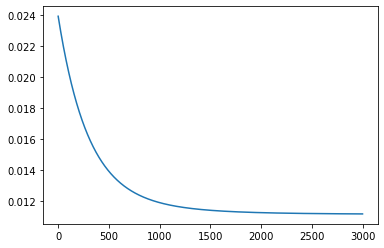

In [142]:
plt.plot(j_hist)
plt.show()

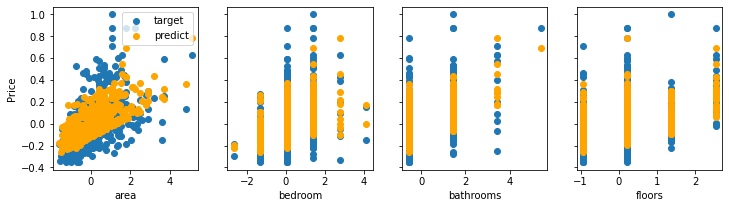

In [143]:
m, n = X_train.shape
yp = np.zeros(m)

for i in range(m):
    yp[i] = np.dot(X_train[i], w) + b
    
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label="target")
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:, i], yp, c="orange", label="predict")
ax[0].set_ylabel("Price")
ax[0].legend()
plt.show()